# How to start this notebook

Download the git repository. Then convert the Excel file to CSV using Office and put it in the same directory. Then in a bash terminal (this might need some modifications when run on windows...):

    virtualenv --python=python3 env
    source env/bin/activate
    pip install jupyter matplotlib pandas
    jupyter notebook

This will open a tab in your browser. Then click on the "Nuclear power attitudes, Example graphs" file in the list presented there. You can re-run each cell in the notebook with SHIFT-ENTER.

The last expression in a cell will be shown if it is a value. .head() takes the first few rows of a value, so ending a cell with e.g. "data.head()", will display the first few rows of data.

In [ ]:
%pylab inline
import pandas as pd

In [109]:
data = pd.read_csv("Vaida_energy_data_dissertation.csv")

data.head()

,Energy type,Year,Country,Political Party,Politician(s),Tone of the Article,Slant,Link
0,Nuclear energy,1994,Germany,V,Undine-Uta Bloch von Blottnitz,neutral,0,http://www.europarl.europa.eu/sides/getDoc.do?...
1,NaN,1995,Austria and Netherlands,ELDR,"Martina Gredler, Elly Plooij-van Gorsel",negative,-1,http://www.europarl.europa.eu/sides/getDoc.do?...
2,NaN,1995,Germany,V,Hiltrud Breyer,about nuclear missiles; negative ???,-1,http://www.europarl.europa.eu/sides/getDoc.do?...
3,NaN,1995,United Kingdom,PSE,Alex Smith,leakes in Atlantic; negative ???,-1,http://www.europarl.europa.eu/sides/getDoc.do?...
4,NaN,1996,Germany,V,Hiltrud Breyer,maybe slightly negative,-1,http://www.europarl.europa.eu/sides/getDoc.do?...


In [239]:
slant_and_year_counts = data.groupby(['Year', 'Slant'])["Slant"].count().unstack(level=-1).fillna(0)

slant_and_year_counts.head()

Slant,-1,0,1
Year,,,
1994,0.0,1.0,0.0
1995,3.0,0.0,0.0
1996,4.0,0.0,0.0
1997,4.0,0.0,0.0
1998,5.0,2.0,0.0


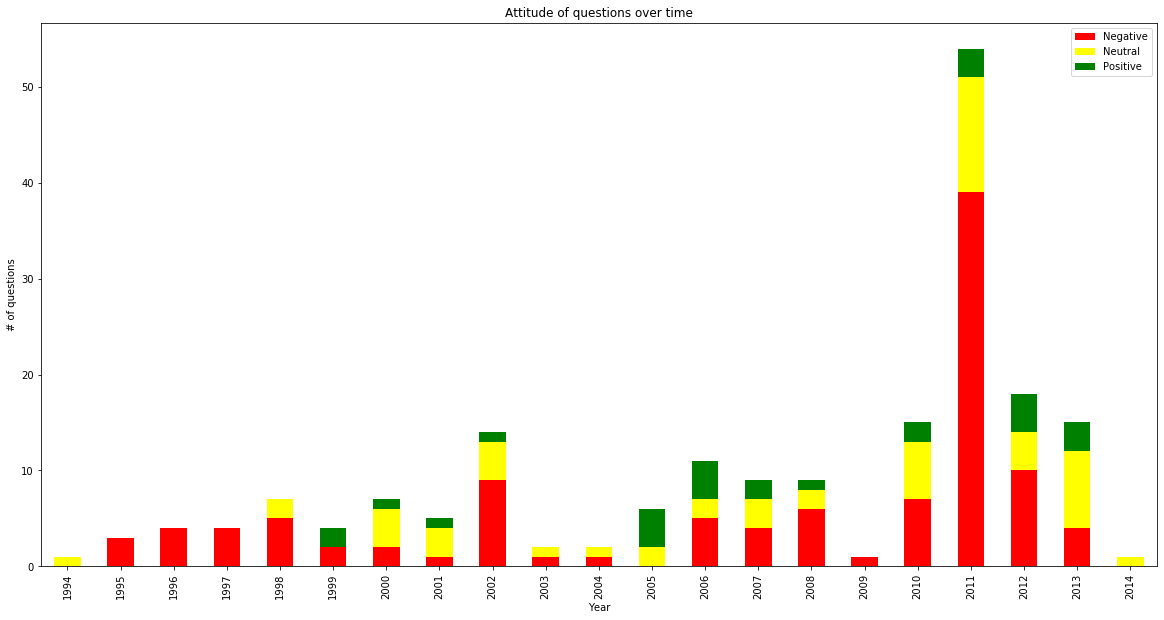

In [245]:
fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(1)

slant_and_year_counts.loc[:,[-1, 0, 1]].plot.bar(
    ax=ax, stacked=True, color=["red", "yellow", "green"],
    figsize=(20, 10))

ax.legend(["Negative", "Neutral", "Positive"]);
ax.set_ylabel("# of questions")
ax.set_xlabel("Year")
ax.set_title("Attitude of questions over time")
plt.show()

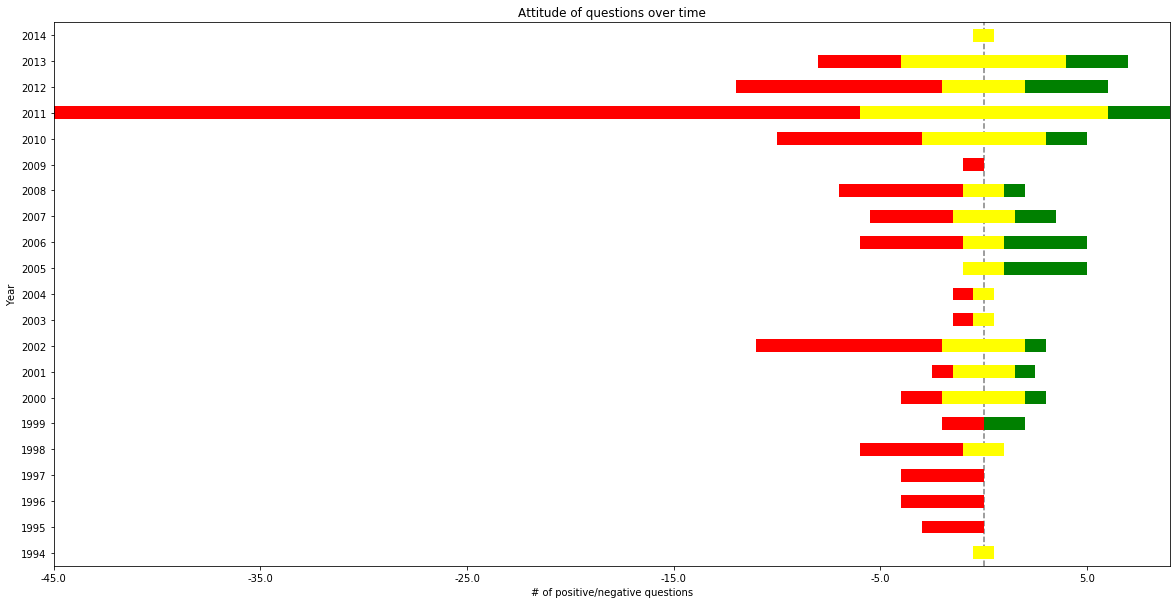

In [233]:
# This chart is a bit complicated to generate as Likert charts are not built in to matplotlib
# It generates a fake invisible extra bar for every year that pushes all the other bars to the right
# the exact right amount...

fig = plt.figure(figsize=(20,10))
ax = fig.subplots(1)

likert_colors = ['white', 'red','yellow', 'green']

likert = slant_and_year_counts.copy()

middles = likert[-1]+likert[0]*.5
longest = middles.max()
complete_longest = likert.sum(axis=1).max()
likert.insert(0, '', (middles - longest).abs())

likert.plot.barh(ax = ax, stacked=True, color=likert_colors, edgecolor='none', legend=False)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

plt.xlim(0, complete_longest)
xvalues = np.arange(0,complete_longest,10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.ylabel("Year")
plt.xlabel("# of positive/negative questions")
plt.title("Attitude of questions over time")
plt.show()

In [159]:
party_and_year_counts = data.groupby(['Year', 'Political Party'])["Political Party"].count().unstack(level=-1).fillna(0)

party_and_year_counts.head()

Political Party,ALDE,"ALDE, Verts/ALE",ECR,EFD,ELDR,GUE/NGL,ITS,NI,PPE,"PPE, ECR","PPE, S&D",PPE-DE,PSE,S&D,UEN,V,Verts/ALE,V
Year,,,,,,,,,,,,,,,,,,
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


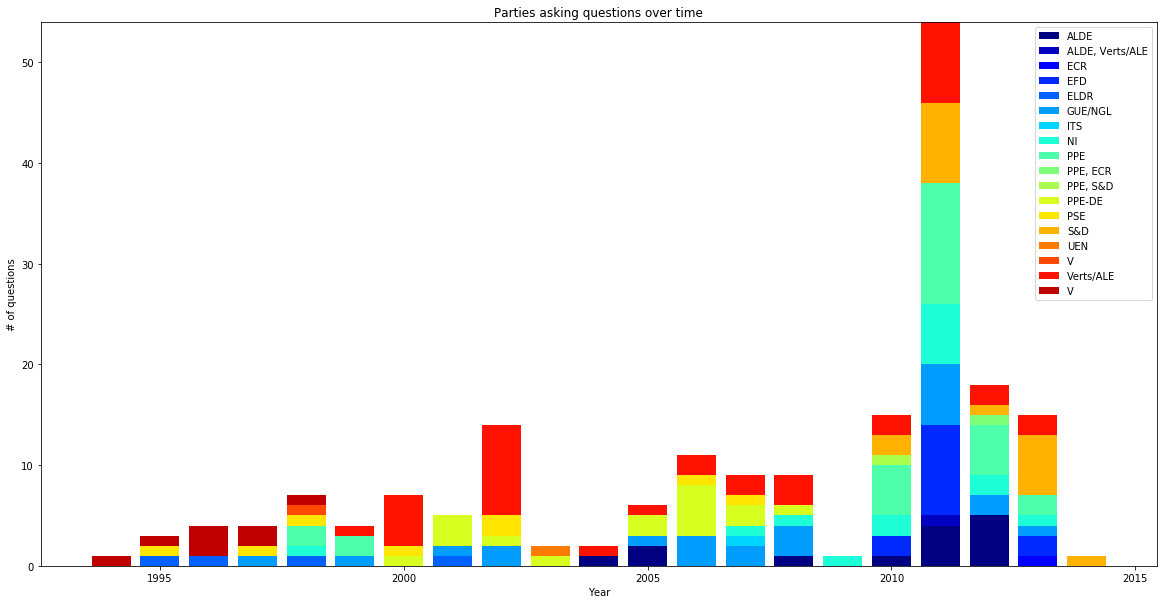

In [246]:
parties = list(data["Political Party"])

plt.figure(figsize=(20, 10))
bottom = np.zeros(len(party_and_year_counts.index))
for idx, party in enumerate(party_and_year_counts.columns):
    
    shade = idx / len(party_and_year_counts.columns)
    color = plt.get_cmap("jet")(shade)
    
    plt.bar(party_and_year_counts.index,
            party_and_year_counts[party],
            bottom=bottom,
            color=color,
            label=party)
    bottom = bottom + party_and_year_counts[party]

plt.ylabel("# of questions")
plt.xlabel("Year")
plt.title("Parties asking questions over time")
plt.legend()

In [165]:
slant_and_party_and_year_counts = data.groupby(['Year', 'Slant', 'Political Party'])["Slant"].count().unstack(level=(-1, -2)).fillna(0)

slant_and_party_and_year_counts.head()

Political Party,V,ELDR,PSE,V,GUE/NGL,PPE,V,NI,PPE,Verts/ALE,...,S&D,EFD,"PPE, S&D",EFD,"ALDE, Verts/ALE",EFD,S&D,"PPE, ECR",ECR,S&D
Slant,0,-1,-1,-1,-1,-1,-1,0,0,-1,...,-1,0,0,1,-1,-1,0,1,1,1
Year,,,,,,,,,,,,,,,,,,,,,
1994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


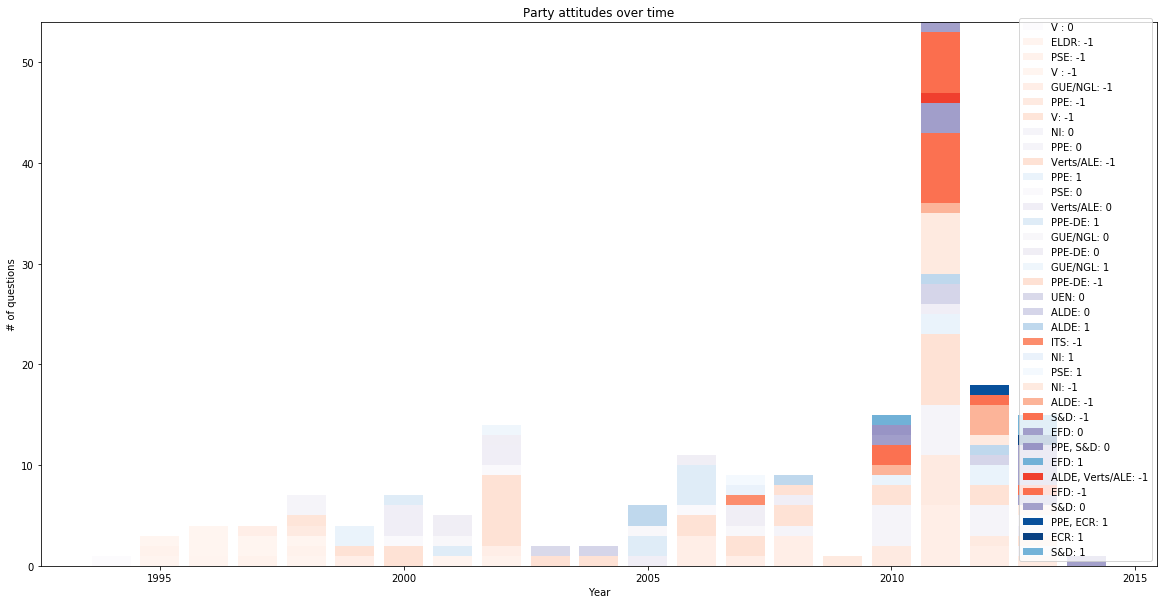

In [247]:
parties = list(data["Political Party"])

plt.figure(figsize=(20, 10))
bottom = np.zeros(len(slant_and_party_and_year_counts.index))

for party, slant in slant_and_party_and_year_counts.columns:
    
    shade = parties.index(party) / len(parties)
    hue = plt.get_cmap("Reds" if slant == -1 else "Purples" if slant == 0 else "Blues")
    color = hue(shade)
    
    plt.bar(slant_and_party_and_year_counts.index,
            slant_and_party_and_year_counts[(party, slant)],
            bottom = bottom,
            color=color,
            label="%s: %s" % (party, slant))
    bottom = bottom + slant_and_party_and_year_counts[(party, slant)]
    
plt.ylabel("# of questions")
plt.xlabel("Year")
plt.title("Party attitudes over time")
plt.legend()

In [172]:
party_attitudes = data.groupby(['Political Party', 'Slant'])["Slant"].count().unstack(level=-1).fillna(0)
party_attitudes.head()

Slant,-1,0,1
Political Party,,,
ALDE,5.0,4.0,5.0
"ALDE, Verts/ALE",1.0,0.0,0.0
ECR,0.0,0.0,1.0
EFD,7.0,5.0,1.0
ELDR,4.0,0.0,0.0


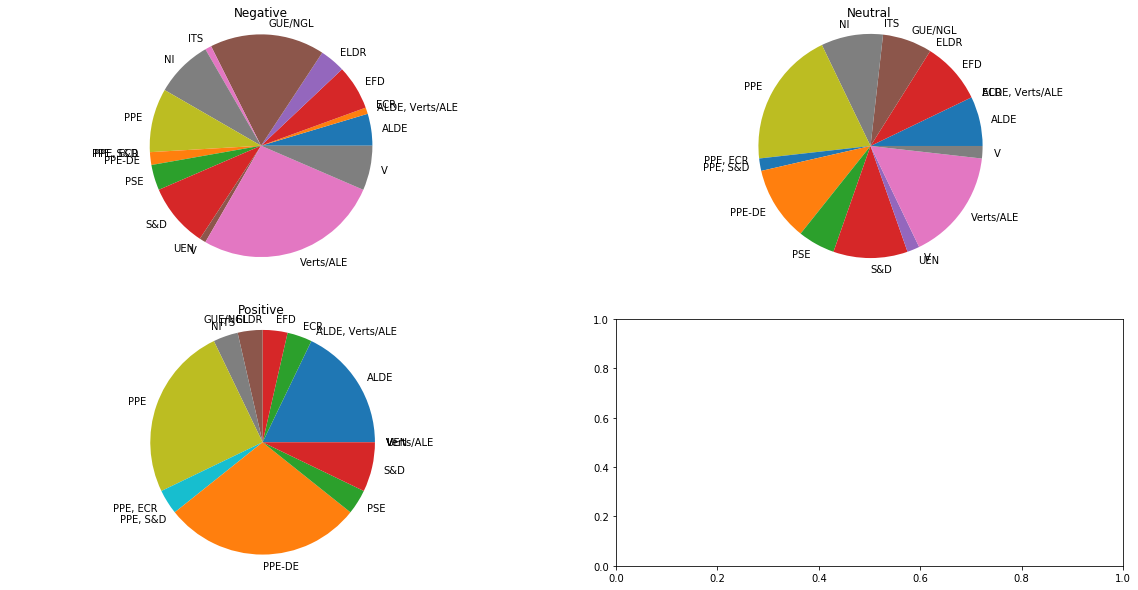

In [188]:
fig = plt.figure(figsize=(20, 10))
subplots = fig.subplots(2,2)

subplots[0, 0].pie(party_attitudes[-1], labels=party_attitudes.index)
subplots[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
subplots[0, 0].set_title("Negative")

subplots[0, 1].pie(party_attitudes[0], labels=party_attitudes.index)
subplots[0, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
subplots[0, 1].set_title("Neutral")

subplots[1, 0].pie(party_attitudes[1], labels=party_attitudes.index)
subplots[1, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
subplots[1, 0].set_title("Positive")


plt.show()
